In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('/home/zack83/Dropbox/Tripura_University/Project_Final/Databases/Final_Databases/FULL_Non-Liver_Merged.csv')

In [3]:
df = df.drop(['STATUS'],axis =1)

In [4]:
X=df.drop(['CLASS'],axis = 1)
y=df['CLASS']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.10, random_state = 0)

print("Train Shape: {}".format(X_train.shape))
print("Test Shape: {}".format(X_test.shape))

Train Shape: (927, 17)
Test Shape: (103, 17)


In [6]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
y_pred_dtree = dtree.predict(X_test)
score = dtree.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_dtree, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_dtree))

Score of the model is -  0.9805825242718447
Report card of this model - 
              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        17
         1.0      0.979     1.000     0.989        46
         2.0      0.944     1.000     0.971        17
         3.0      1.000     0.913     0.955        23

    accuracy                          0.981       103
   macro avg      0.981     0.978     0.979       103
weighted avg      0.981     0.981     0.980       103

Accuracy score -  0.9805825242718447


Text(20.72222222222222, 0.5, 'Truth')

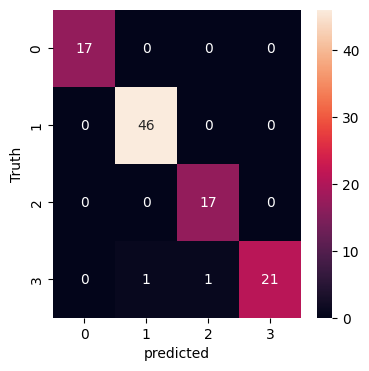

In [7]:
y_predicted = dtree.predict(X_test)
cm = confusion_matrix(y_test,y_predicted)

plt.figure(figsize = (4,4))
sns.heatmap(cm,annot = True)
plt.xlabel("predicted")
plt.ylabel("Truth")

In [8]:
dtree = DecisionTreeClassifier(max_depth = None , random_state = 1 , max_features = None, min_samples_leaf =20)
dtree.fit(X_train,y_train)
y_pred_dtree = dtree.predict(X_test)
score = dtree.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_dtree, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_dtree))

Score of the model is -  0.9514563106796117
Report card of this model - 
              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        17
         1.0      0.939     1.000     0.968        46
         2.0      0.895     1.000     0.944        17
         3.0      1.000     0.783     0.878        23

    accuracy                          0.951       103
   macro avg      0.958     0.946     0.948       103
weighted avg      0.955     0.951     0.949       103

Accuracy score -  0.9514563106796117


Text(20.72222222222222, 0.5, 'Truth')

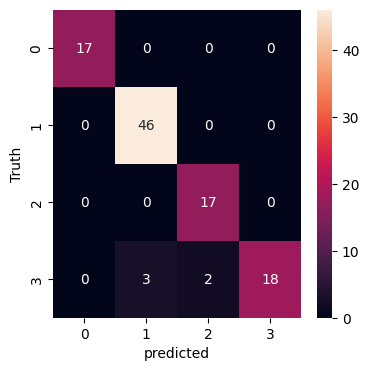

In [9]:
y_predicted = dtree.predict(X_test)
cm = confusion_matrix(y_test,y_predicted)

plt.figure(figsize = (4,4))
sns.heatmap(cm,annot = True)
plt.xlabel("predicted")
plt.ylabel("Truth")

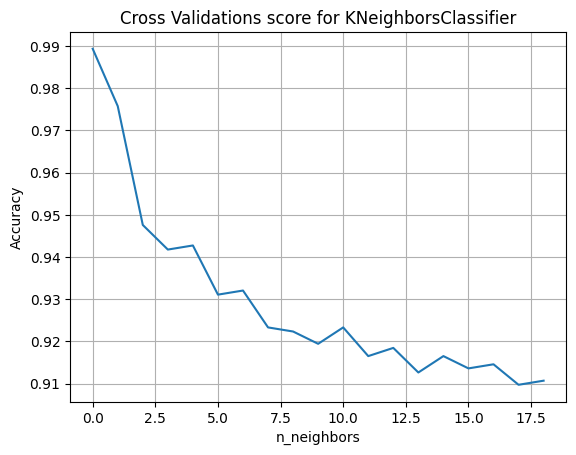

In [10]:
hist = []
for i in range(1,20):
    clf = KNeighborsClassifier(n_neighbors=i)
    cross_val = cross_val_score(clf, X, y, cv=5)
    hist.append(np.mean(cross_val))
plt.plot(hist)
plt.title('Cross Validations score for KNeighborsClassifier')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
score = knn.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_knn, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_knn))

Score of the model is -  0.9902912621359223
Report card of this model - 
              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        17
         1.0      0.979     1.000     0.989        46
         2.0      1.000     1.000     1.000        17
         3.0      1.000     0.957     0.978        23

    accuracy                          0.990       103
   macro avg      0.995     0.989     0.992       103
weighted avg      0.990     0.990     0.990       103

Accuracy score -  0.9902912621359223


Text(20.72222222222222, 0.5, 'Truth')

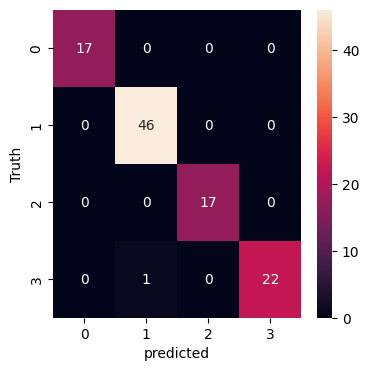

In [12]:
y_predicted = knn.predict(X_test)
cm = confusion_matrix(y_test,y_predicted)

plt.figure(figsize = (4,4))
sns.heatmap(cm,annot = True)
plt.xlabel("predicted")
plt.ylabel("Truth")

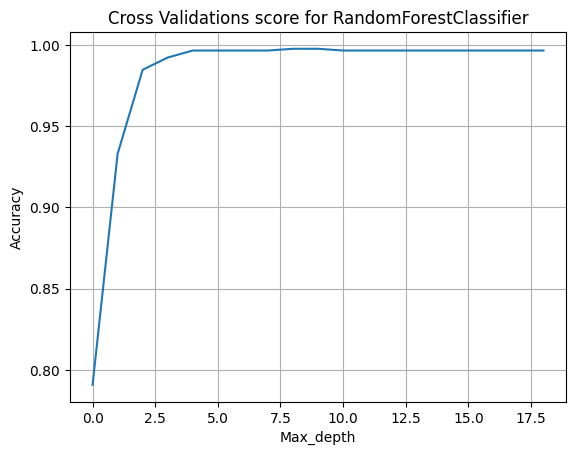

In [13]:
hist1 = []
for i in range(1,20):
    clf = RandomForestClassifier(n_estimators=80, max_depth=i, random_state=0)
    cross_val = cross_val_score(clf, X_train, y_train, cv=5)
    hist1.append(np.mean(cross_val))
plt.plot(hist1)
plt.title('Cross Validations score for RandomForestClassifier')
plt.xlabel('Max_depth')
plt.ylabel('Accuracy')
plt.grid()

In [14]:
ran_for = RandomForestClassifier(n_estimators=100, max_depth= 3, random_state=0)
ran_for.fit(X_train,y_train)
y_pred_ran = ran_for.predict(X_test)
score = ran_for.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_ran, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_ran))

Score of the model is -  0.9902912621359223
Report card of this model - 
              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        17
         1.0      0.979     1.000     0.989        46
         2.0      1.000     1.000     1.000        17
         3.0      1.000     0.957     0.978        23

    accuracy                          0.990       103
   macro avg      0.995     0.989     0.992       103
weighted avg      0.990     0.990     0.990       103

Accuracy score -  0.9902912621359223


Text(20.72222222222222, 0.5, 'Truth')

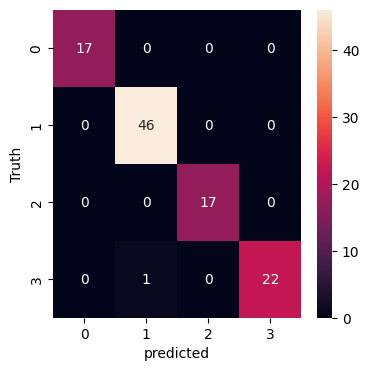

In [15]:
y_predicted = ran_for.predict(X_test)
cm = confusion_matrix(y_test,y_predicted)

plt.figure(figsize = (4,4))
sns.heatmap(cm,annot = True)
plt.xlabel("predicted")
plt.ylabel("Truth")

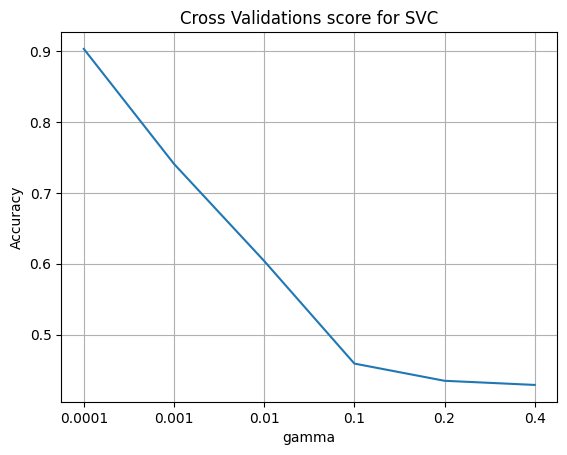

In [16]:
grid = [0.0001,0.001, 0.01, 0.1,0.2,0.4]
hist = []
for val in grid:
    clf = SVC(gamma=val)
    cross_val = cross_val_score(clf, X, y, cv=5)
    hist.append(np.mean(cross_val))
plt.plot([str(i) for i in grid], hist)
plt.title('Cross Validations score for SVC')
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [17]:
svm = SVC(kernel= "linear",C=0.1, random_state = 0 )
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
score = svm.score(X_test, y_test)
print("Score of the model is - ",score)
print("Report card of this model - ")
print(metrics.classification_report(y_test, y_pred_svm, digits=3))
print("Accuracy score - ", metrics.accuracy_score(y_test,y_pred_svm))

Score of the model is -  0.9805825242718447
Report card of this model - 
              precision    recall  f1-score   support

         0.0      1.000     1.000     1.000        17
         1.0      0.979     1.000     0.989        46
         2.0      0.944     1.000     0.971        17
         3.0      1.000     0.913     0.955        23

    accuracy                          0.981       103
   macro avg      0.981     0.978     0.979       103
weighted avg      0.981     0.981     0.980       103

Accuracy score -  0.9805825242718447


Text(20.72222222222222, 0.5, 'Truth')

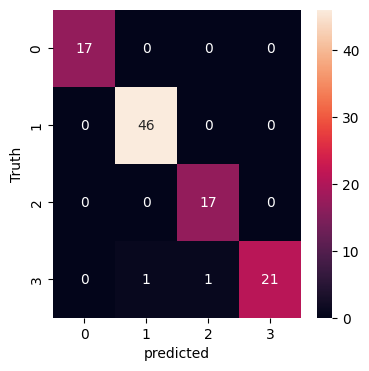

In [18]:
y_predicted = svm.predict(X_test)
cm = confusion_matrix(y_test,y_predicted)

plt.figure(figsize = (4,4))
sns.heatmap(cm,annot = True)
plt.xlabel("predicted")
plt.ylabel("Truth")

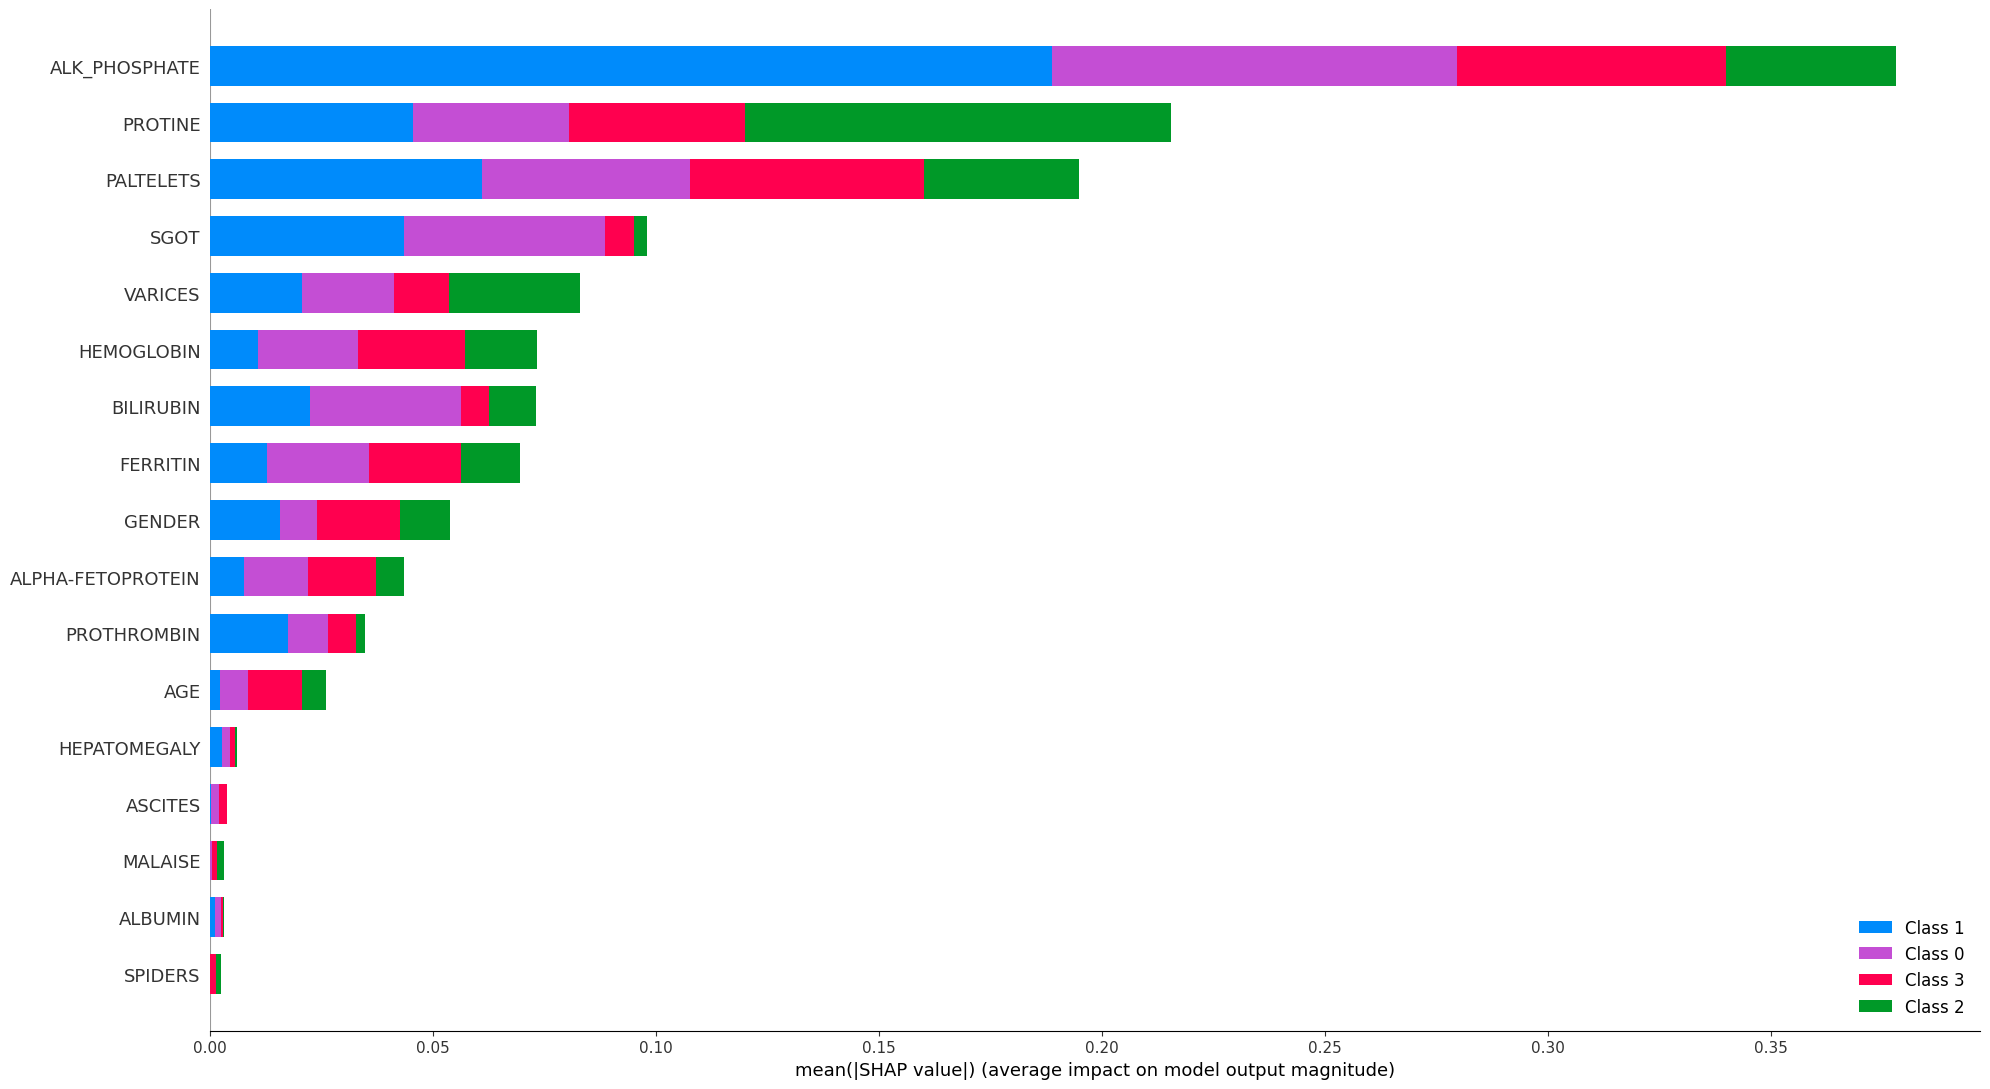

In [19]:
import shap
ran_for = RandomForestClassifier(n_estimators=100, max_depth= 3, random_state=0)

ran_for.fit(X, y)

explainer = shap.TreeExplainer(ran_for)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_size=(20,11), alpha=0.2, plot_type='bar')

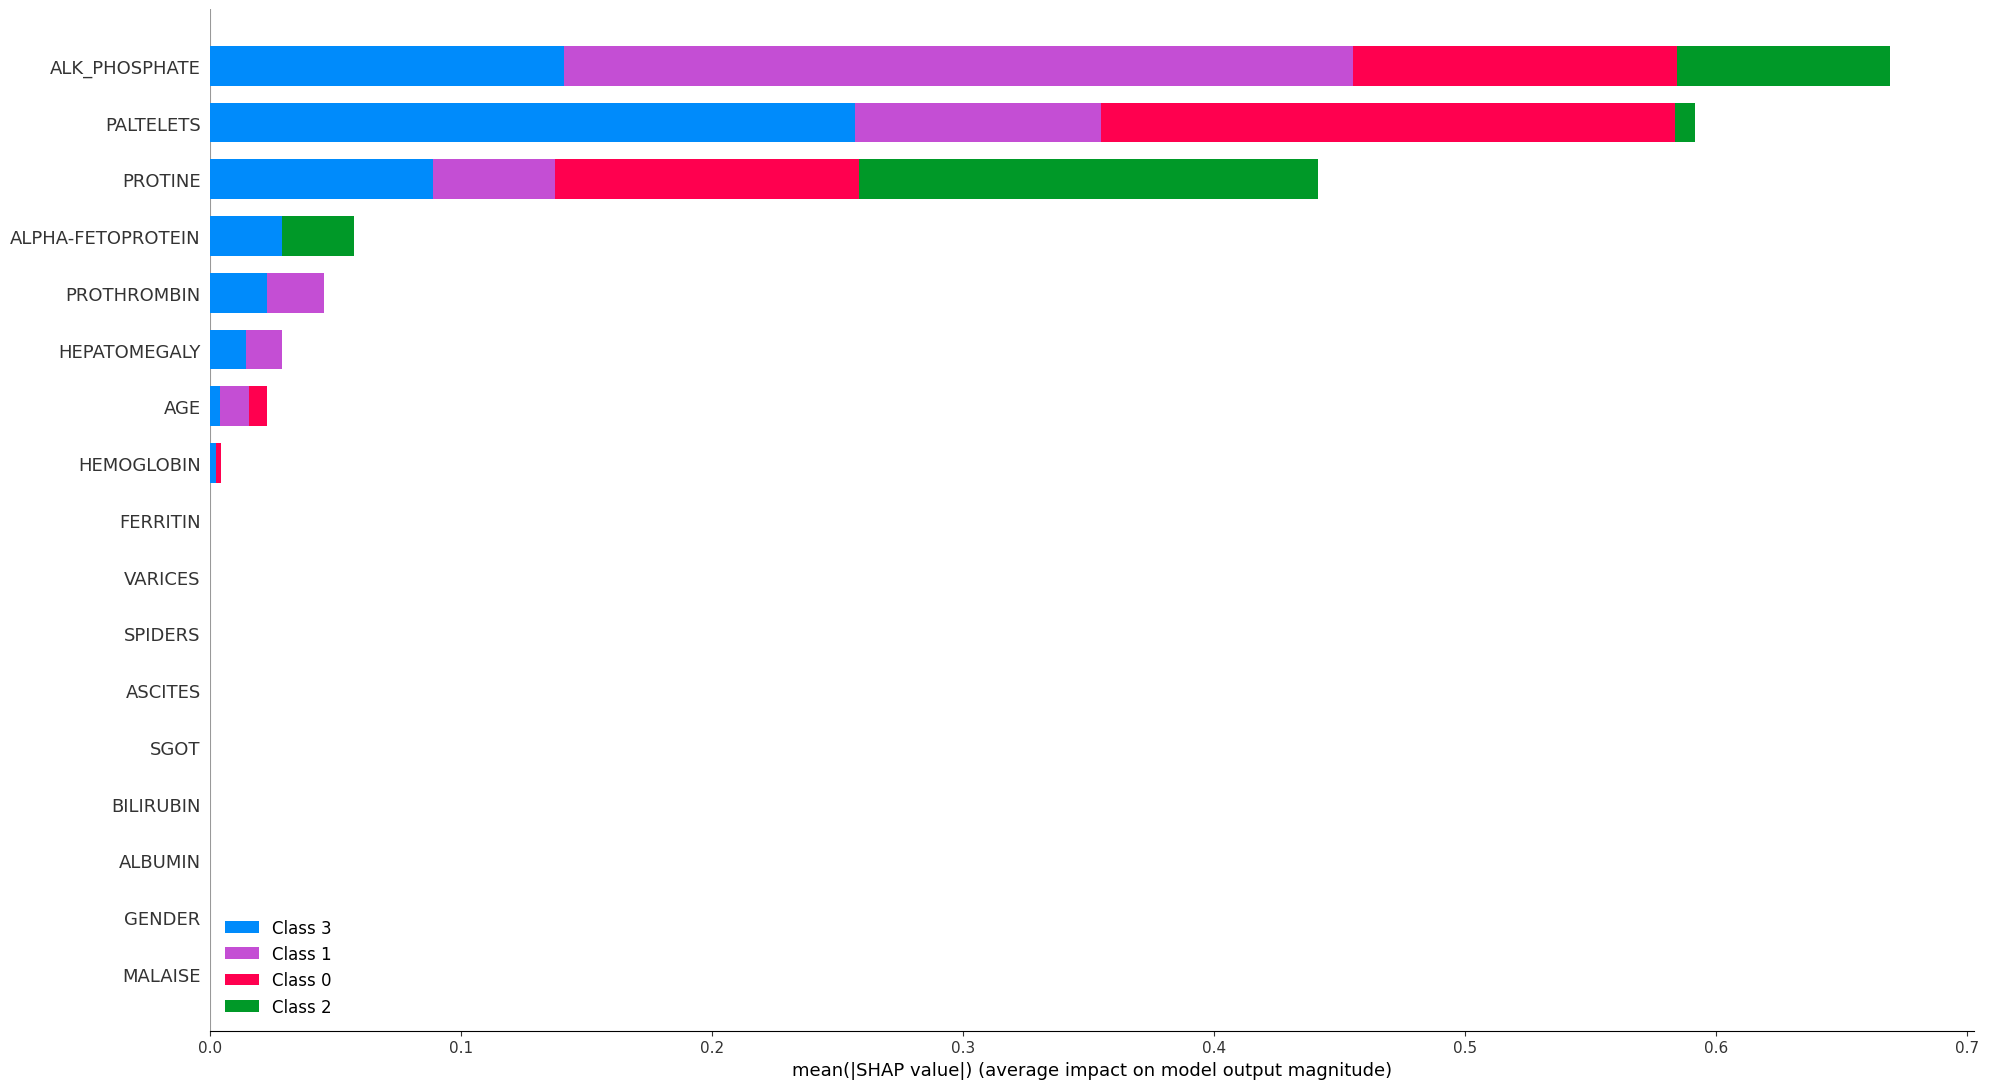

In [20]:
import shap
dtree = DecisionTreeClassifier()

dtree.fit(X, y)

explainer = shap.TreeExplainer(dtree)

# calculate shap values. This is what we will plot.
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, plot_size=(20,11), alpha=0.2, plot_type='bar')